# City of Chicago Crimes Data Exploration

In [1]:
import pandas as pd
import os
from pathlib import Path
import Data
import coordinates

In [2]:
currpath = os.getcwd()
mypath = Path().absolute().parent # each '.parent' goes one level up - vary as required
#print(mypath)
#os.chdir(mypath)
os.chdir(os.path.dirname(os.path.abspath("crimes.csv")))
print(Path().absolute())

C:\Users\chloe\OneDrive\AY2024 FYP\FYP-Code\FYP-Spatial-Analytics


# Data Package Introduction

In [3]:
df = pd.read_csv("Data/crimes.csv")
df.describe()

ID       District           Ward  Community Area  \
count  4.993170e+05  499317.000000  499304.000000   499317.000000   
mean   1.292516e+07      11.318767      23.251969       36.274527   
std    7.028720e+05       7.098315      14.106800       21.562981   
min    2.654300e+04       1.000000       1.000000        1.000000   
25%    1.277560e+07       5.000000      10.000000       22.000000   
50%    1.295900e+07      10.000000      24.000000       32.000000   
75%    1.314454e+07      17.000000      34.000000       53.000000   
max    1.334356e+07      31.000000      50.000000       77.000000   

       X Coordinate  Y Coordinate           Year       Latitude      Longitude  
count  4.950860e+05  4.950860e+05  499317.000000  495086.000000  495086.000000  
mean   1.165355e+06  1.887202e+06    2022.521645      41.846062     -87.668691  
std    1.655756e+04  3.200432e+04       0.499892       0.088021       0.060218  
min    0.000000e+00  0.000000e+00    2022.000000      36.619446     -91.686566  
25%    1.153938e+06  1.859491e+06    2022.000000      41.769868     -87.710210  
50%    1.167163e+06  1.893471e+06    2023.000000      41.863375     -87.661857  
75%    1.176816e+06  1.910237e+06    2023.000000      41.909616     -87.626649  
max    1.205119e+06  1.951506e+06    2024.000000      42.022549     -87.524532

In [4]:
df

ID Case Number                    Date  \
0       13325102    JH100383  01/01/2024 12:35:00 AM   
1       13324869    JH100080  01/01/2024 12:32:00 AM   
2       13334424    JH111086  01/01/2024 12:30:00 AM   
3       13330629    JH106692  01/01/2024 12:30:00 AM   
4       13324809    JH100033  01/01/2024 12:30:00 AM   
...          ...         ...                     ...   
499312  12591578    JF111765  01/01/2022 12:50:00 AM   
499313  12581825    JF100053  01/01/2022 12:50:00 AM   
499314  12581804    JF100047  01/01/2022 12:48:00 AM   
499315  12585133    JF104070  01/01/2022 12:48:00 AM   
499316  12581862    JF100062  01/01/2022 12:38:00 AM   

                      Primary Type                         Description  \
0                  CRIMINAL DAMAGE                          TO VEHICLE   
1                          BATTERY             DOMESTIC BATTERY SIMPLE   
2       OFFENSE INVOLVING CHILDREN                       OTHER OFFENSE   
3                  CRIMINAL DAMAGE                          TO VEHICLE   
4                          BATTERY                              SIMPLE   
...                            ...                                 ...   
499312                     BATTERY             DOMESTIC BATTERY SIMPLE   
499313             CRIMINAL DAMAGE                         TO PROPERTY   
499314                     BATTERY             DOMESTIC BATTERY SIMPLE   
499315          DECEPTIVE PRACTICE  ATTEMPT - FINANCIAL IDENTITY THEFT   
499316                     BATTERY             DOMESTIC BATTERY SIMPLE   

        Arrest  Domestic  District  Ward  Community Area FBI Code  \
0        False     False        19  46.0               3       14   
1         True      True        18  42.0               8      08B   
2        False      True         8  17.0              66       20   
3        False     False        10  24.0              30       14   
4        False     False        17  39.0              13      08B   
...        ...       ...       ...   ...             ...      ...   
499312   False      True         9  14.0              58      08B   
499313   False     False         6   6.0              44       14   
499314    True      True        19  44.0               6      08B   
499315   False      True        25  31.0              19       11   
499316   False      True        10  12.0              30      08B   

        X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0          1166300.0     1930873.0  2024  01/09/2024 03:40:58 PM  41.965895   
1          1178425.0     1903153.0  2024  01/09/2024 03:40:58 PM  41.889561   
2          1154757.0     1855327.0  2024  01/12/2024 03:40:16 PM  41.758828   
3          1156023.0     1889423.0  2024  01/09/2024 03:40:58 PM  41.852366   
4          1155076.0     1934388.0  2024  01/09/2024 03:40:58 PM  41.975773   
...              ...           ...   ...                     ...        ...   
499312     1156148.0     1873804.0  2022  01/03/2023 03:40:27 PM  41.809503   
499313     1182123.0     1850775.0  2022  01/03/2023 03:40:27 PM  41.745747   
499314     1168046.0     1921748.0  2022  01/03/2023 03:40:27 PM  41.940818   
499315     1143288.0     1916670.0  2022  01/03/2023 03:40:27 PM  41.927382   
499316     1157727.0     1888597.0  2022  01/03/2023 03:40:27 PM  41.850065   

        Longitude                       Location  
0      -87.663930  (41.965894533, -87.663929744)  
1      -87.620197  (41.889561428, -87.620196651)  
2      -87.708393  (41.758827609, -87.708393124)  
3      -87.702837  (41.852366315, -87.702836579)  
4      -87.705103  (41.975773105, -87.705103499)  
...           ...                            ...  
499312 -87.702799  (41.809503342, -87.702798559)  
499313 -87.608239  (41.745747124, -87.608239392)  
499314 -87.657775  (41.940817562, -87.657774548)  
499315 -87.748897  (41.927382386, -87.748897111)  
499316 -87.696605  (41.850065177, -87.696604858)  

[499317 rows x 18 columns]

# Creation of new dataset

## Criminal damage to property 

In [5]:
df_1 = df[(df['Primary Type'] == 'CRIMINAL DAMAGE') &
                        (df['Description'] == 'TO PROPERTY')]

# Group by Latitude and Longitude, count occurrences, and join with df_1
df_2 = (df_1.groupby(['Latitude', 'Longitude'])
          .size()
          .reset_index(name='n')
          .merge(df_1, on=['Latitude', 'Longitude'])
          .drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
          .loc[:, ['Latitude', 'Longitude', 'n']]
          .assign(location_id=lambda x: x.groupby(['Latitude', 'Longitude']).ngroup() + 1))

# Display the resulting DataFrame
print(df_2)

        Latitude  Longitude  n  location_id
0      41.644590 -87.615880  1            1
1      41.645029 -87.614971  1            2
2      41.647039 -87.616098  1            3
3      41.647039 -87.614404  1            4
4      41.647447 -87.617235  1            5
...          ...        ... ..          ...
24404  42.022465 -87.666542  1        19406
24405  42.022525 -87.672272  1        19407
24406  42.022535 -87.673475  1        19408
24407  42.022536 -87.673593  1        19409
24408  42.022548 -87.676139  1        19410

[19410 rows x 4 columns]


## OR Criminal damage to vehicle

In [7]:
# Filter rows where PrimaryType is 'CRIMINAL DAMAGE' and Description is 'TO VEHICLE'
df_3 = df[(df['Primary Type'] == 'CRIMINAL DAMAGE') &
                        (df['Description'] == 'TO VEHICLE')]

# Group by Latitude and Longitude, count occurrences, and join with df_1
df_4 = (df_3.groupby(['Latitude', 'Longitude'])
          .size()
          .reset_index(name='n')
          .merge(df_3, on=['Latitude', 'Longitude'])
          .drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
          .loc[:, ['Latitude', 'Longitude', 'n']]
          .assign(location_id=lambda x: x.groupby(['Latitude', 'Longitude']).ngroup() + 1))

# Display the resulting DataFrame
print(df_4)

        Latitude  Longitude  n  location_id
0      41.644590 -87.615880  1            1
1      41.647037 -87.616647  1            2
2      41.647039 -87.616098  2            3
4      41.647180 -87.544241  1            4
5      41.647716 -87.542811  1            5
...          ...        ... ..          ...
30992  42.022526 -87.672401  1        25450
30993  42.022529 -87.666324  1        25451
30994  42.022535 -87.673398  2        25452
30996  42.022536 -87.673711  1        25453
30997  42.022548 -87.676139  1        25454

[25454 rows x 4 columns]


# Remove missing values

In [8]:
crimes_property_df = df_2.copy()
missing_values = crimes_property_df.isnull().sum()
print(missing_values)

Latitude       0
Longitude      0
n              0
location_id    0
dtype: int64


In [9]:
crimes_vehicle_df = df_4.copy()
missing_values = crimes_vehicle_df.isnull().sum()
print(missing_values)

Latitude       0
Longitude      0
n              0
location_id    0
dtype: int64


# General summary of dataset created

Since there are no missing values, no processing is needed here. 

In [10]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import shapely
import seaborn as sns

In [11]:
crimes_property_df.describe()

Latitude     Longitude             n   location_id
count  19410.000000  19410.000000  19410.000000  19410.000000
mean      41.831163    -87.667273      1.257548   9705.500000
std        0.091770      0.060302      0.778449   5603.328698
min       41.644590    -87.922965      1.000000      1.000000
25%       41.754672    -87.711150      1.000000   4853.250000
50%       41.819250    -87.663647      1.000000   9705.500000
75%       41.903074    -87.624121      1.000000  14557.750000
max       42.022548    -87.525749     27.000000  19410.000000

In [12]:
crimes_vehicle_df.describe()

Latitude     Longitude             n   location_id
count  25454.000000  25454.000000  25454.000000  25454.000000
mean      41.838825    -87.668302      1.217805  12727.500000
std        0.088466      0.058705      0.912950   7348.081212
min       41.644590    -87.915105      1.000000      1.000000
25%       41.763600    -87.710031      1.000000   6364.250000
50%       41.846656    -87.665186      1.000000  12727.500000
75%       41.906683    -87.625783      1.000000  19090.750000
max       42.022548    -87.525270     31.000000  25454.000000

In [ ]:
crimes_property_df.to_csv('crimes_processed_property.csv', index=False)
crimes_vehicle_df.to_csv('crimes_processed_vehicle.csv', index=False)

# Checking distribution of n values

In [13]:
selected_variable = 'n'  

# Count the frequency of each distinct value
value_counts_property = crimes_property_df[selected_variable].value_counts().sort_index()

# Create a new DataFrame with the frequency information
frequency_df_property = pd.DataFrame({
    'Value': value_counts_property.index,
    'Frequency': value_counts_property.values,
    'Percentage':((value_counts_property.values)/len(crimes_property_df)) * 100
})

# Display the new DataFrame
frequency_df_property

Value  Frequency  Percentage
0       1      16159   83.250902
1       2       2315   11.926842
2       3        556    2.864503
3       4        206    1.061309
4       5         91    0.468830
5       6         35    0.180319
6       7         19    0.097888
7       8          8    0.041216
8       9          3    0.015456
9      10          4    0.020608
10     11          5    0.025760
11     12          3    0.015456
12     13          1    0.005152
13     14          1    0.005152
14     15          1    0.005152
15     19          1    0.005152
16     20          1    0.005152
17     27          1    0.005152

In [14]:
selected_variable = 'n'  

# Count the frequency of each distinct value
value_counts_vehicle = crimes_vehicle_df[selected_variable].value_counts().sort_index()

# Create a new DataFrame with the frequency information
frequency_df_vehicle = pd.DataFrame({
    'Value': value_counts_vehicle.index,
    'Frequency': value_counts_vehicle.values,
    'Percentage':((value_counts_vehicle.values)/len(crimes_vehicle_df)) * 100
})

# Display the new DataFrame
frequency_df_vehicle

Value  Frequency  Percentage
0       1      22244   87.389015
1       2       2266    8.902334
2       3        523    2.054687
3       4        186    0.730730
4       5         72    0.282863
5       6         45    0.176790
6       7         27    0.106074
7       8         20    0.078573
8       9         19    0.074644
9      10          9    0.035358
10     11         11    0.043215
11     12          5    0.019643
12     13          5    0.019643
13     14          2    0.007857
14     15          2    0.007857
15     16          4    0.015715
16     17          3    0.011786
17     18          2    0.007857
18     19          2    0.007857
19     21          1    0.003929
20     22          1    0.003929
21     23          2    0.007857
22     28          2    0.007857
23     31          1    0.003929

<Axes: xlabel='n', ylabel='Count'>

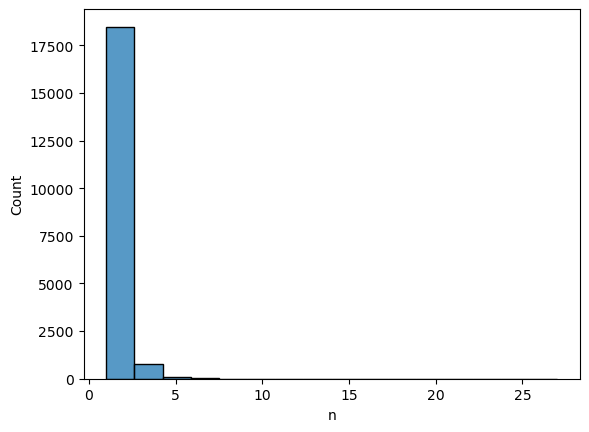

In [15]:
sns.histplot(x=crimes_property_df['n'])

<Axes: xlabel='n', ylabel='Count'>

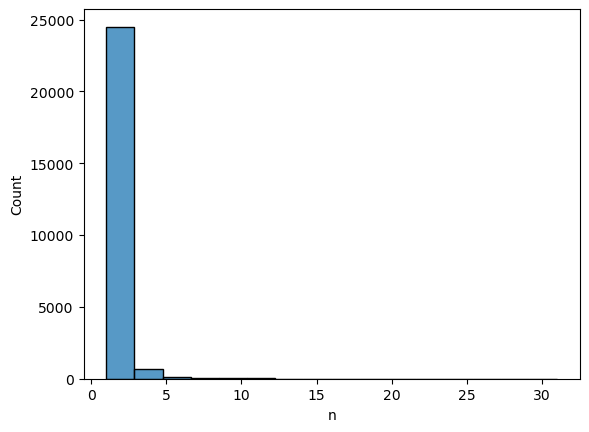

In [16]:
sns.histplot(x=crimes_vehicle_df['n'])

# Plotting Spatial distributions of crimes

## Criminal damage to property

### Using a subset of data where n > 2

In [17]:
subset_df_property = crimes_property_df[(crimes_property_df['n'] > 2)]
subset_df_property

Latitude  Longitude   n  location_id
22     41.651431 -87.527258  19           23
74     41.653230 -87.549571   3           53
103    41.654612 -87.543513   3           79
115    41.654999 -87.602309   4           88
128    41.655385 -87.613162   3           98
...          ...        ...  ..          ...
24277  42.018145 -87.669697   3        19319
24292  42.018498 -87.672983   3        19332
24340  42.019953 -87.668247   5        19375
24359  42.020598 -87.666437   3        19389
24375  42.022063 -87.674849  27        19403

[936 rows x 4 columns]

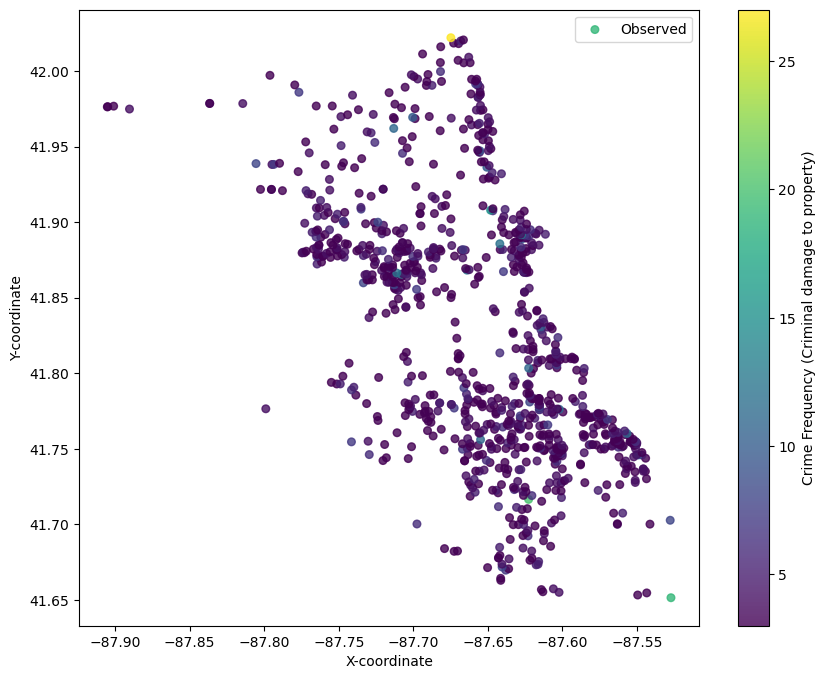

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_property = subset_df_property['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with color bar
scatter_plot = ax.scatter(subset_df_property['Longitude'], subset_df_property['Latitude'], c=n_values_property, cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to property)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()


### Using full dataset (All n values)

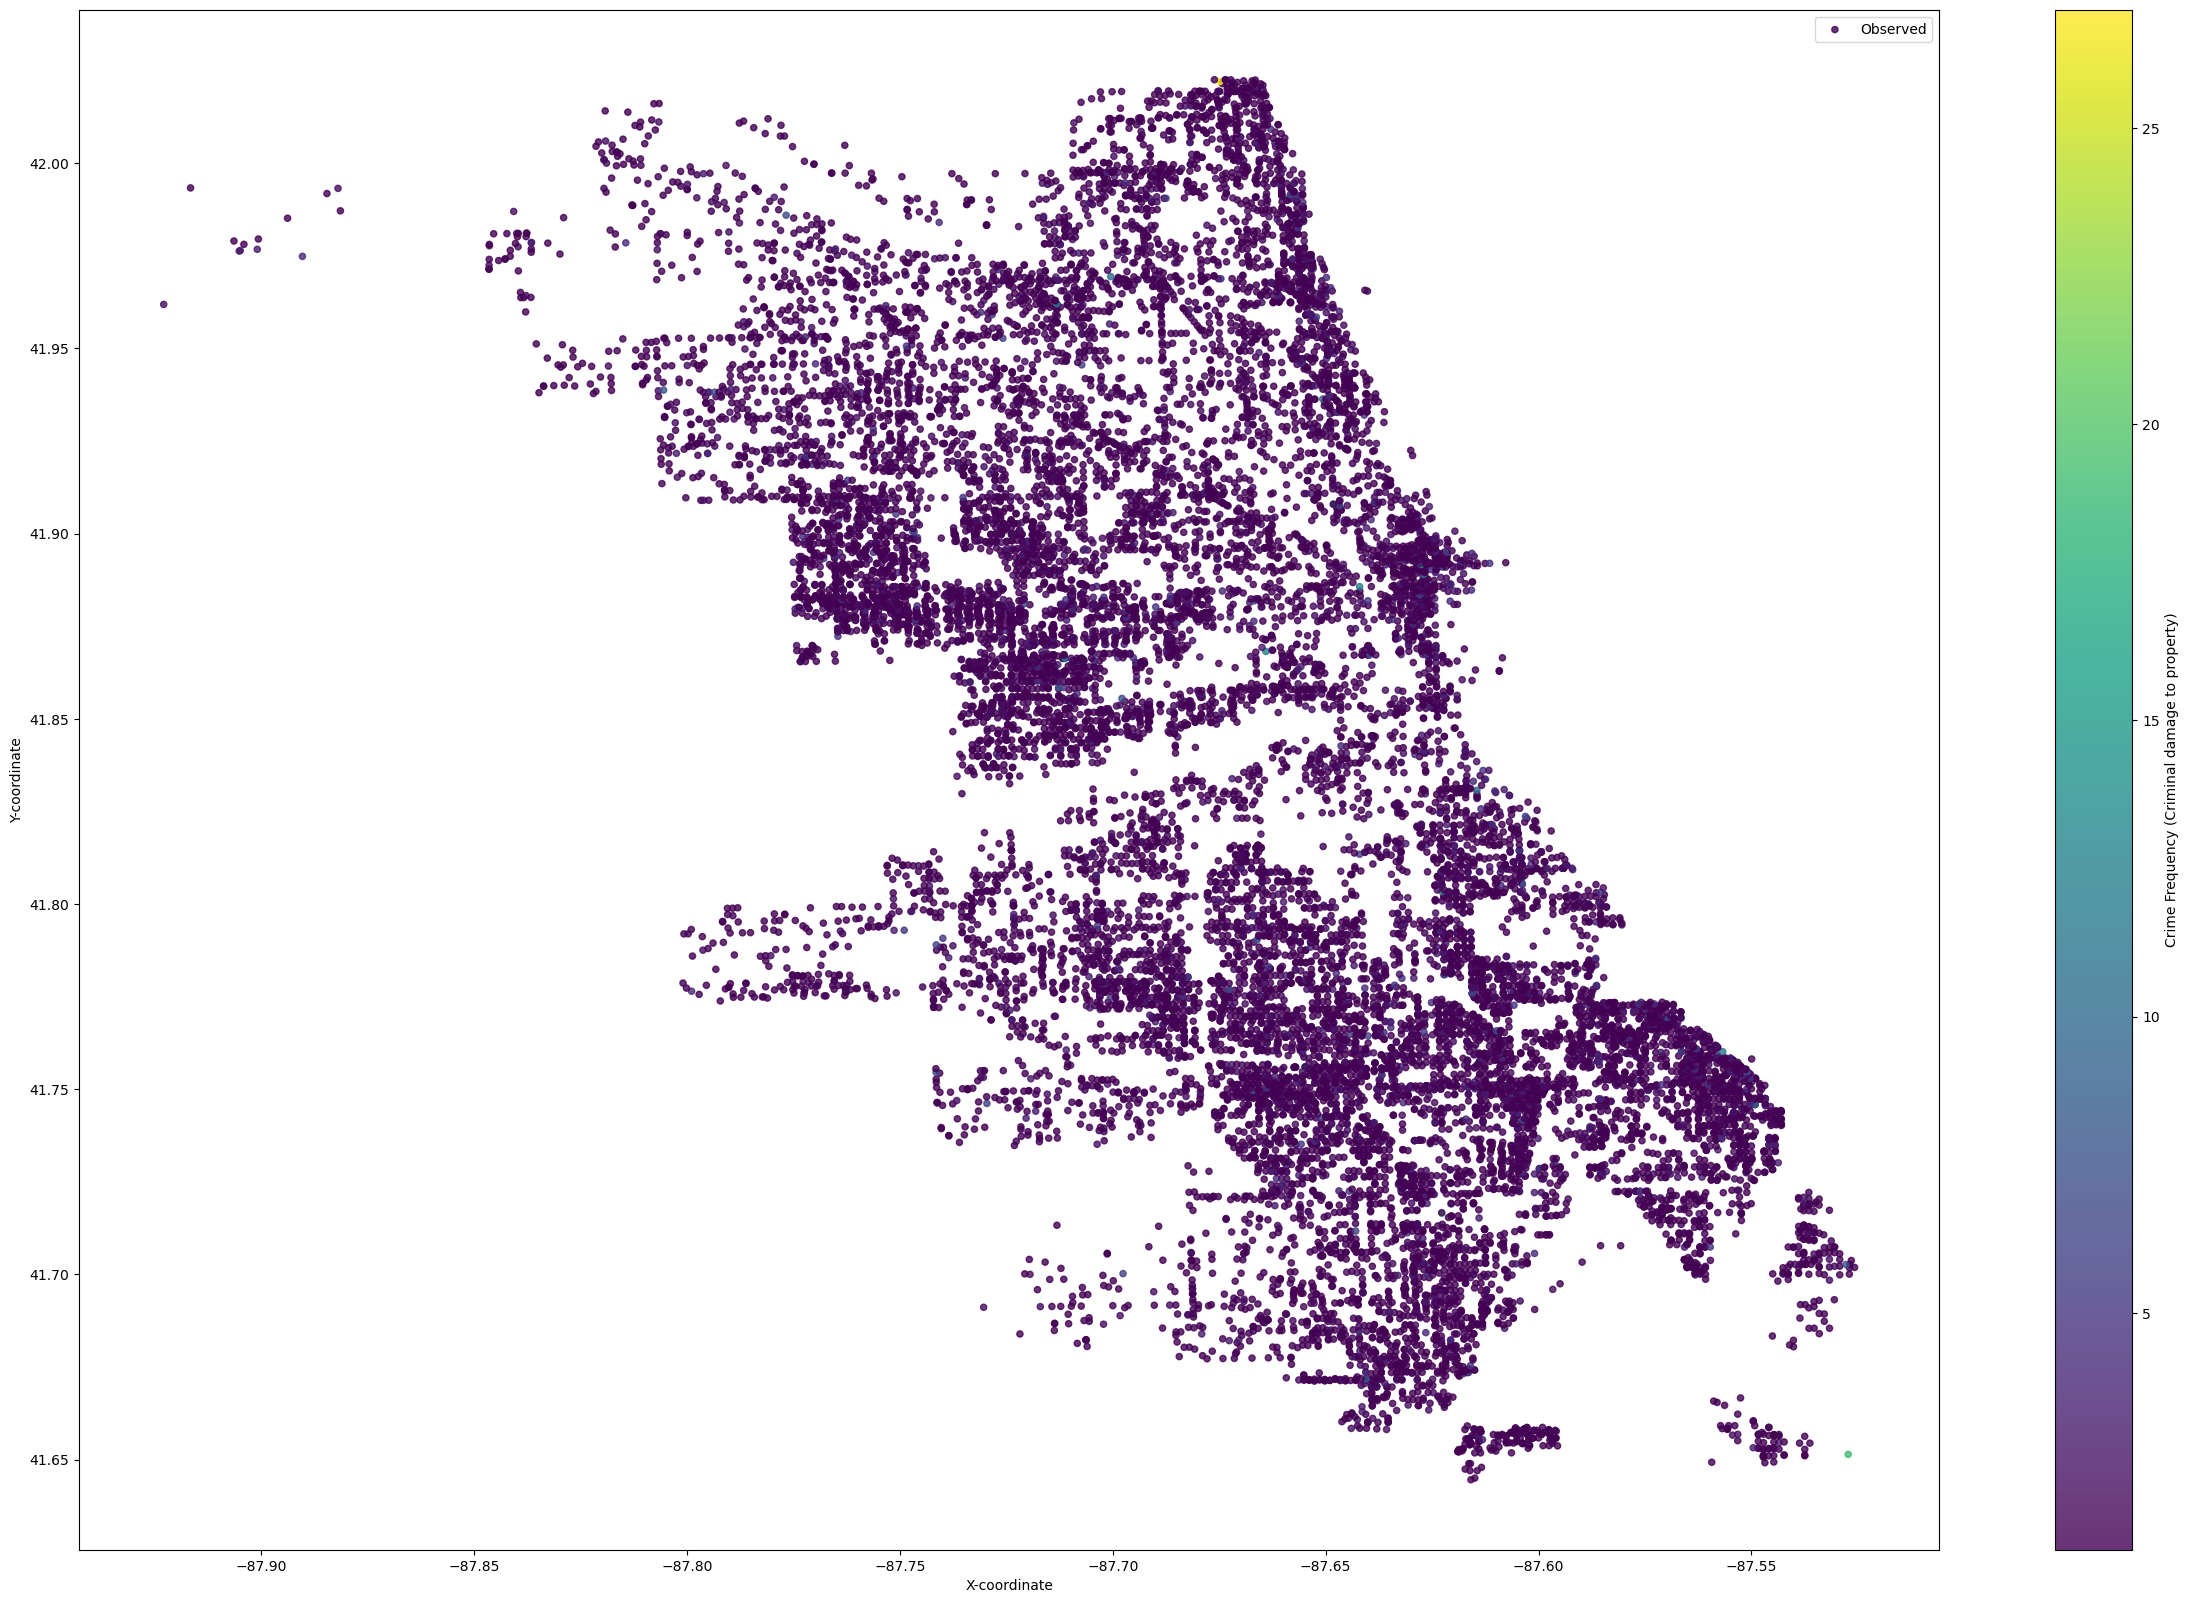

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_property = crimes_property_df['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(30, 20))

# Scatter plot with color bar
scatter_plot = ax.scatter(crimes_property_df['Longitude'], crimes_property_df['Latitude'], c=n_values_property, cmap='viridis', label='Observed', marker='o', s=20, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to property)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()


## Criminal damage to vehicle

### Using a subset of data where n > 2

In [21]:
subset_df_vehicle = crimes_vehicle_df[(crimes_vehicle_df['n'] > 2)]
subset_df_vehicle

Latitude  Longitude  n  location_id
28     41.651431 -87.527258  5           27
92     41.654602 -87.547147  3           81
184    41.657284 -87.604380  3          160
297    41.664363 -87.630614  3          261
306    41.665815 -87.558854  9          268
...          ...        ... ..          ...
30787  42.015041 -87.663503  9        25277
30799  42.015124 -87.680827  3        25280
30815  42.015464 -87.676452  3        25292
30935  42.019366 -87.669809  3        25403
30955  42.019974 -87.671912  3        25420

[944 rows x 4 columns]

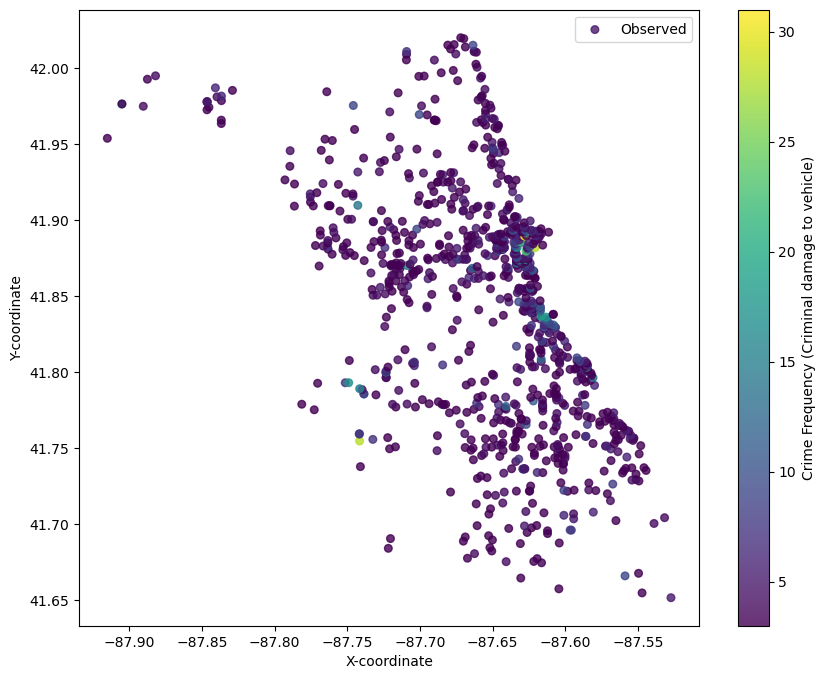

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_vehicle = subset_df_vehicle['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with color bar
scatter_plot = ax.scatter(subset_df_vehicle['Longitude'], subset_df_vehicle['Latitude'], c=n_values_vehicle, cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to vehicle)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()

### Using full dataset (All n values)

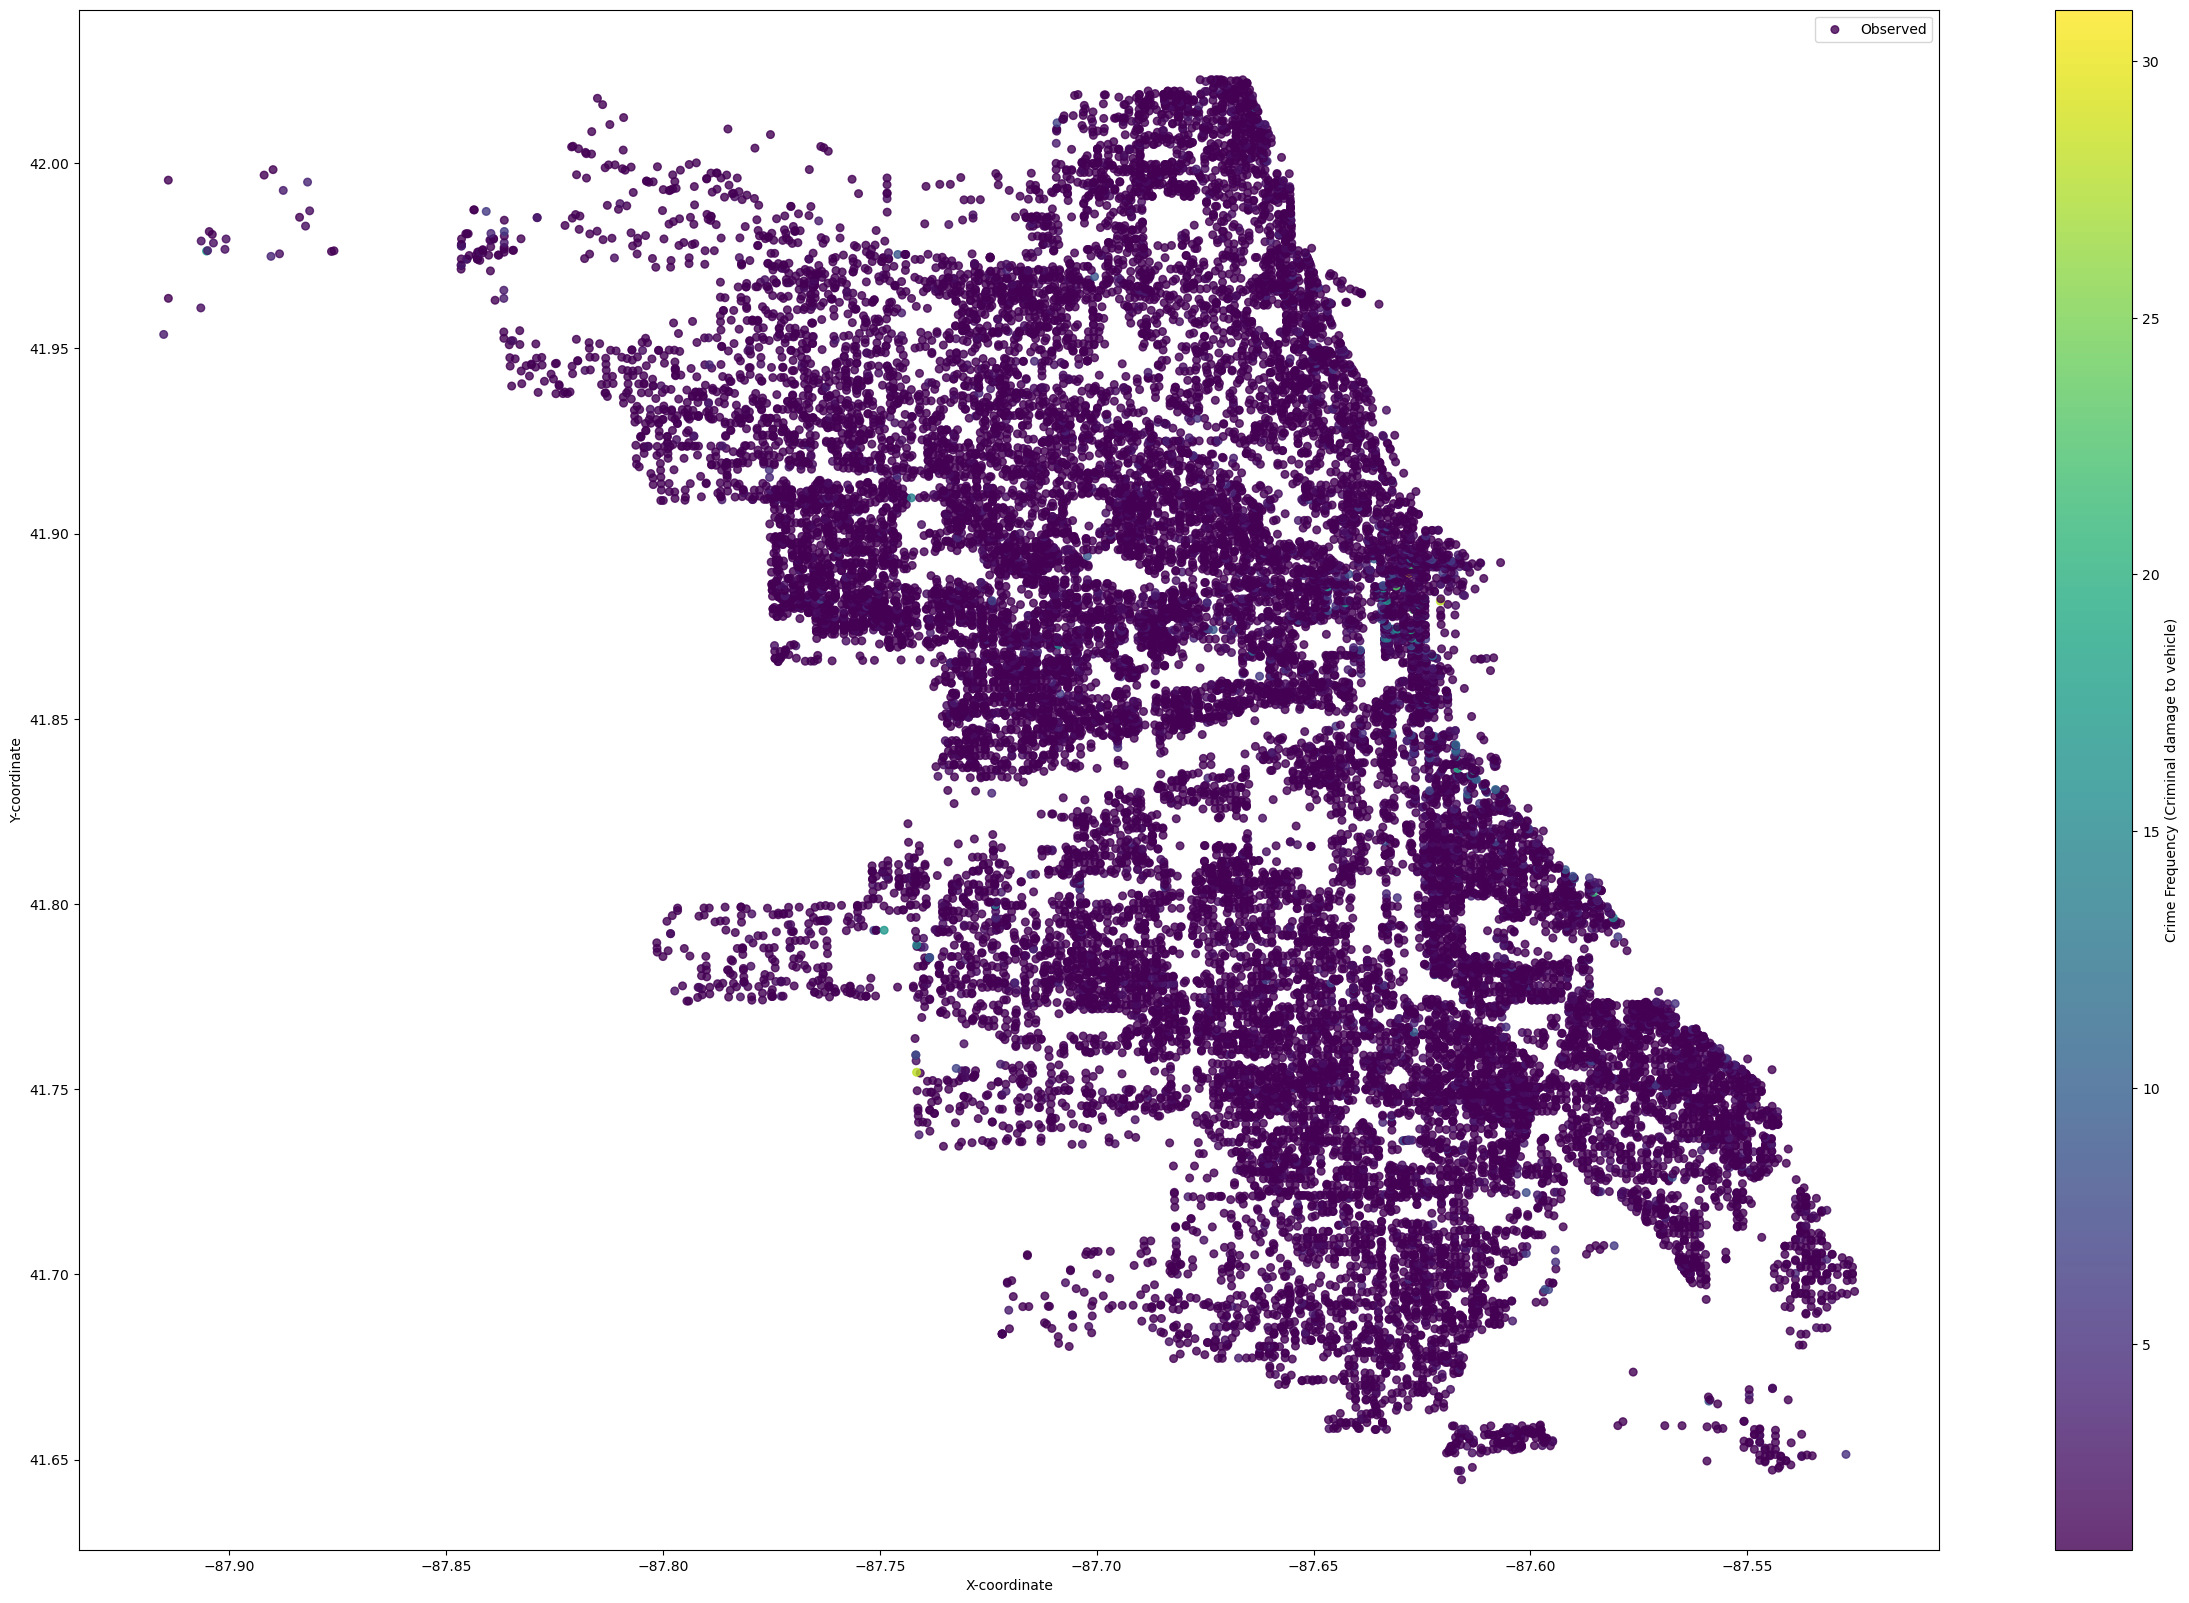

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

n_values_vehicle = crimes_vehicle_df['n']

# Increase figure size
fig, ax = plt.subplots(figsize=(30, 20))

# Scatter plot with color bar
scatter_plot = ax.scatter(crimes_vehicle_df['Longitude'], crimes_vehicle_df['Latitude'], c=n_values_vehicle, cmap='viridis', label='Observed', marker='o', s=30, alpha=0.8)

# Add color bar for crime frequency
cbar = plt.colorbar(scatter_plot, label='Crime Frequency (Criminal damage to vehicle)')

# Set labels and legend
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.legend()

# Display the plot
plt.show()